# Introduction
Prophet can handle;
1. trend with its changepoints,
2. seasonality (yearly, weekly, daily, and other user-defined seasonality),
3. holiday effect, and
4. input regressors
as model components, and there’s also uncertainty options to control the prediction uncertainty interval.

Here’s what Prophet default functions provide to each of the components.

## Load Data

In [12]:
from google.colab import data_table


data_table.enable_dataframe_formatter()

In [13]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.6 MB/s 
     |████████████████████████████████| 49 kB 6.6 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641443 sha256=1563414dceca6ece0b46828eaf85c7a5ceba70787c191e2361905eff00627de4
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [14]:
# Python
import pandas as pd
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric


In [16]:

from google.colab import files
 
 
uploaded = files.upload()

Saving example_wp_log_peyton_manning.csv to example_wp_log_peyton_manning.csv


In [18]:
# from google.colab import files
# uploaded = files.upload()
file_location = "example_wp_log_peyton_manning.csv"

df = pd.read_csv(file_location)

df.sort_values(by="ds",ascending=True)
print("The Dataset is collected on a Daily basis")

The Dataset is collected on a Daily basis


In [ ]:
df

# Prophet Modeling

## Default Model

In [19]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
# Python
future = m.make_future_dataframe(periods=365)

future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [21]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.213670,7.524895,8.916413
3266,2017-01-16,8.538673,7.861645,9.305176
3267,2017-01-17,8.326104,7.642902,9.115767
3268,2017-01-18,8.158756,7.487520,8.872660
3269,2017-01-19,8.170689,7.433070,8.900824


### Plots

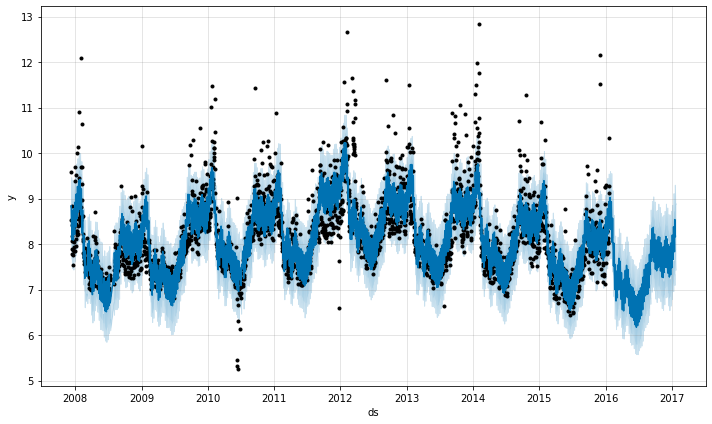

In [22]:
# Python
fig1 = m.plot(forecast)


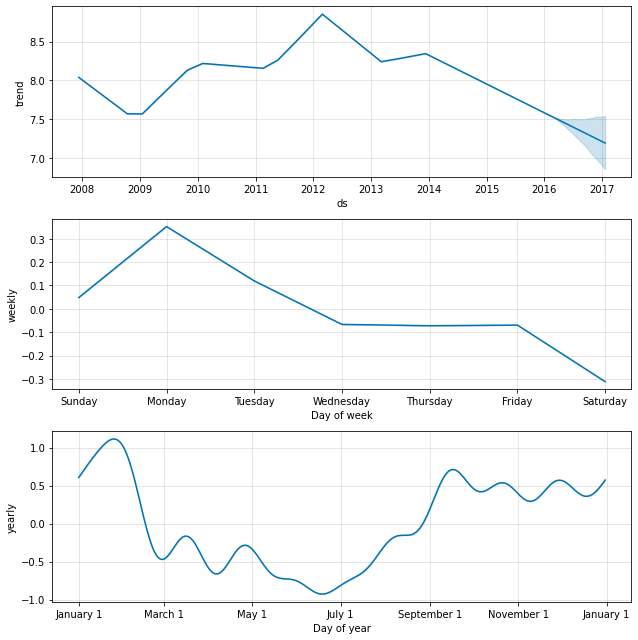

In [23]:
# Python
fig2 = m.plot_components(forecast)


In [24]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [25]:
# Python
plot_components_plotly(m, forecast)


## Evaluation Metrics

INFO:prophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.493705,0.702642,0.504480,0.058452,0.049786,0.058742,0.672910
1,38 days,0.499457,0.706723,0.509446,0.059026,0.049662,0.059376,0.670397
2,39 days,0.521643,0.722249,0.515533,0.059625,0.049708,0.060100,0.667656
3,40 days,0.528916,0.727266,0.518360,0.059926,0.049600,0.060471,0.668799
4,41 days,0.536402,0.732395,0.519336,0.060003,0.049662,0.060611,0.673824


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
324,361 days,1.118393,1.057541,0.856008,0.102606,0.086626,0.101683,0.502056
325,362 days,1.133967,1.064879,0.862683,0.103212,0.087222,0.102242,0.501142
326,363 days,1.155533,1.074957,0.870228,0.103980,0.087222,0.102884,0.497031
327,364 days,1.172033,1.082605,0.877899,0.104914,0.088615,0.103634,0.491320
328,365 days,1.184667,1.088424,0.886846,0.105951,0.088848,0.104513,0.483783


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:539: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:540: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



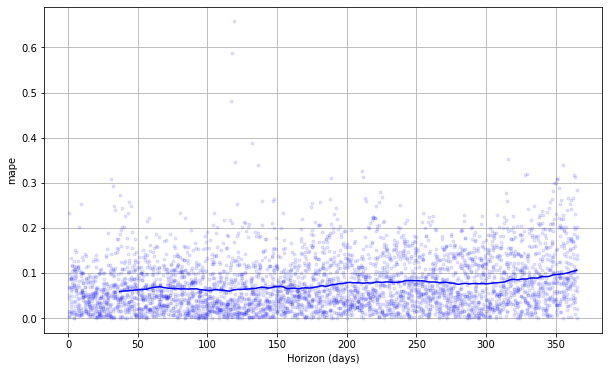

In [26]:

# Execute cross validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

# Prophet Options Cheat Sheets And Use Examples

d
## Uncertainty Option

- Uncertainty Options / Trend Options / Holiday Options
- There are options to control uncertainty, trend (type (or mode), changepoint, and visualization), and holiday effect (country or user-input). Here’s a summary:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


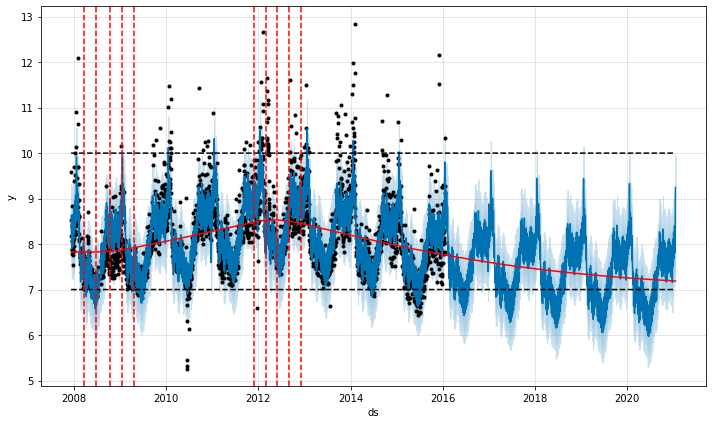

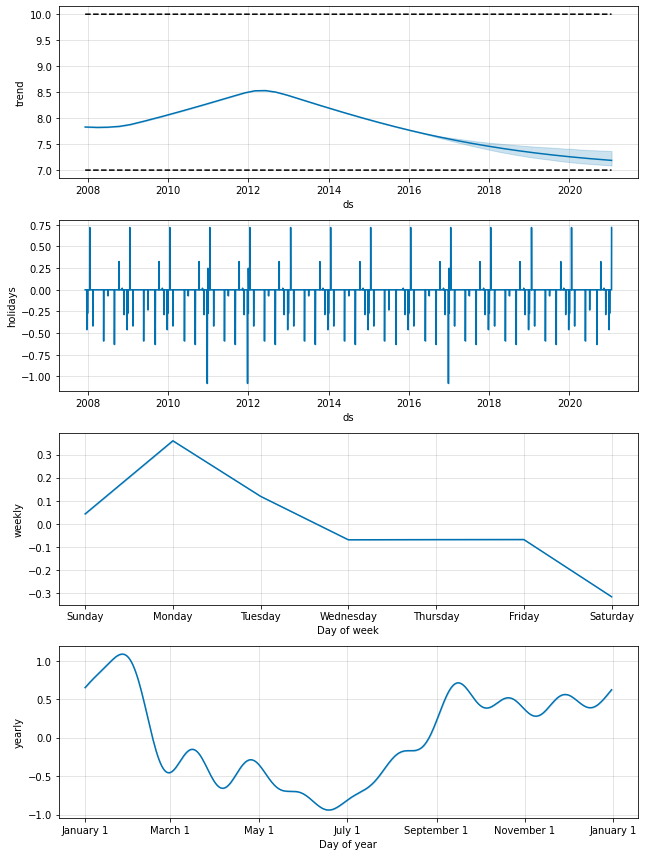

In [27]:
from prophet.plot import add_changepoints_to_plot

df['cap'] = 10 # Saturating maximum
df['floor'] = 7 # Saturating minimum

# Model setup
m = Prophet(growth='logistic')
m.add_country_holidays(country_name='US') # Adding US holiday regressor
m.fit(df) 

# Future data generation
future = m.make_future_dataframe(periods=365*5)
future['cap'] = 10 # Saturating maximum
future['floor'] = 7 # Saturating minimum

# Future forecast
forecast = m.predict(future) 

# Visualize
fig1 = m.plot(forecast) # Plot the fit to past data and future forcast.
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast) # Plot breakdown of components.
plt.show()

## Seasonality Option

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


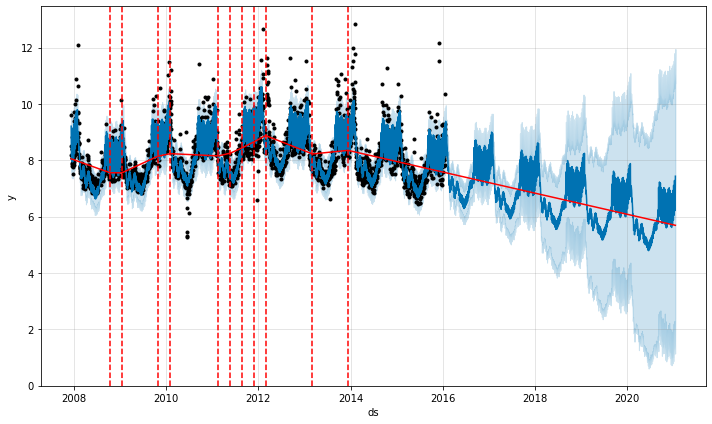

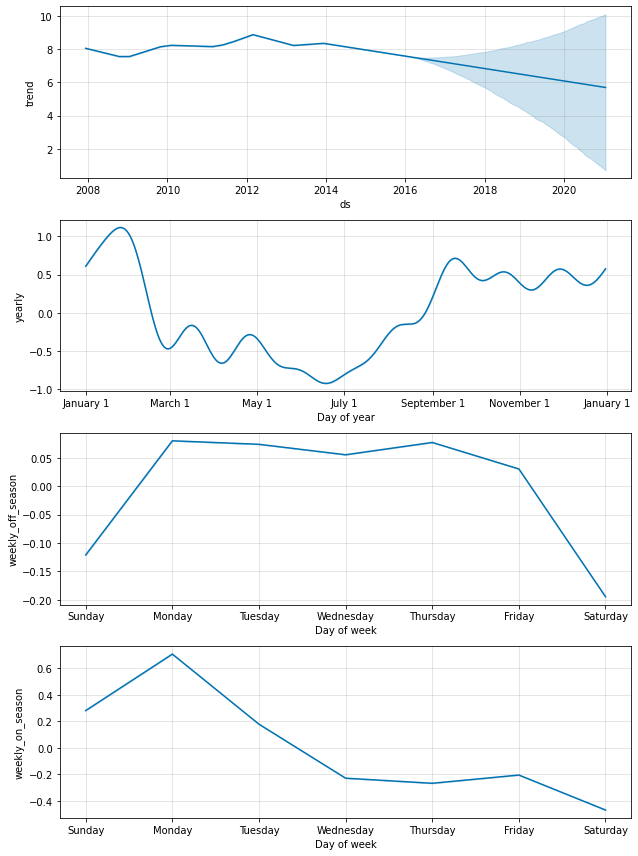

In [28]:

from prophet.plot import add_changepoints_to_plot


def is_nfl_season(ds):
    date = pd.to_datetime(ds)
    return (date.month > 8 or date.month < 2)

df['on_season'] = df['ds'].apply(is_nfl_season) #on_season dummy.
df['off_season'] = ~df['ds'].apply(is_nfl_season) #off_season dummy.

# set user-defined seasonality and fit
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='weekly_on_season', period=7, fourier_order=3, condition_name='on_season')
m.add_seasonality(name='weekly_off_season', period=7, fourier_order=3, condition_name='off_season')
m.fit(df)

# Make the same columns to future data.
future = m.make_future_dataframe(periods=365*5) # Make future date data frame for the next 365 days (it gives daily because it follows the frequency in input dataframe by default).
future['on_season'] = future['ds'].apply(is_nfl_season)
future['off_season'] = ~future['ds'].apply(is_nfl_season)

# Predict future value.
forecast = m.predict(future)

# Plot results
fig1 = m.plot(forecast) # Plot the fit to past data and future forcast.
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast) # Plot breakdown of components.
plt.show()

# Traditional TS Model

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



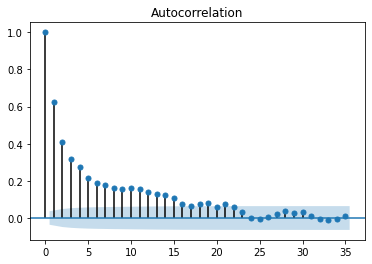

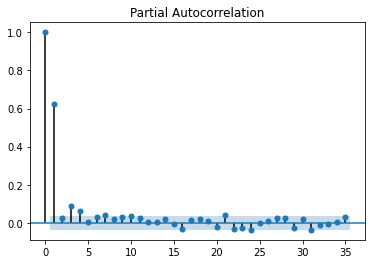

In [29]:
# After getting forecast dataframe using user-defined seasonality "on-season"/"off-season" above...

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

df['ds'] = pd.to_datetime(df['ds'],format='%Y-%m-%d')
df_res = df.merge(forecast,how="inner",on="ds")
df_res['y']= df_res['y'].apply(float)
df_res['residual'] = df_res['y'] - df_res['yhat']
plot_acf(df_res['residual'])
plot_pacf(df_res['residual'])
plt.show()

In [30]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly_off_season', 'weekly_off_season_lower',
       'weekly_off_season_upper', 'weekly_on_season', 'weekly_on_season_lower',
       'weekly_on_season_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

# Diagnostics

In [31]:
# Python
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')


INFO:prophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

In [32]:
# Python
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.945790,8.516529,9.430988,8.242493,2010-02-15
1,2010-02-17,8.865777,8.431720,9.351060,8.008033,2010-02-15
2,2010-02-18,8.769662,8.319414,9.221760,8.045268,2010-02-15
3,2010-02-19,8.644273,8.182512,9.077331,7.928766,2010-02-15
4,2010-02-20,8.349838,7.905361,8.794605,7.745003,2010-02-15


In [33]:
# Python
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

In [34]:
# Python
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.495522,0.703933,0.506163,0.058658,0.046380,0.059062,0.621288
1,38 days,0.494525,0.703225,0.509053,0.059021,0.046698,0.059463,0.621288
2,39 days,0.519180,0.720541,0.517006,0.059818,0.047308,0.060391,0.619918
3,40 days,0.526888,0.725870,0.519240,0.060051,0.047308,0.060696,0.626085
4,41 days,0.529736,0.727830,0.517118,0.059779,0.047019,0.060493,0.634765
...,...,...,...,...,...,...,...,...
324,361 days,1.127017,1.061610,0.850762,0.101924,0.078526,0.101212,0.528095
325,362 days,1.147741,1.071327,0.858650,0.102699,0.080083,0.101903,0.528095
326,363 days,1.169175,1.081284,0.867563,0.103657,0.081330,0.102747,0.523070
327,364 days,1.185984,1.089029,0.875674,0.104631,0.085886,0.103574,0.514847


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:539: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:540: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



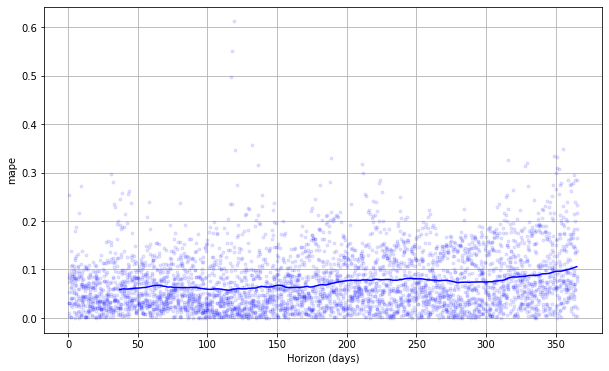

In [35]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


# Hyperparameters

In [36]:
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f7d859db990>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f7d84c6db90>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f7d835a0dd0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f7d84c43d50>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurre

In [37]:
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  0.757430
1                     0.001                     0.10  0.748186
2                     0.001                     1.00  0.753800
3                     0.001                    10.00  0.761568
4                     0.010                     0.01  0.544094
5                     0.010                     0.10  0.539893
6                     0.010                     1.00  0.521288
7                     0.010                    10.00  0.541045
8                     0.100                     0.01  0.522850
9                     0.100                     0.10  0.515238
10                    0.100                     1.00  0.516340
11                    0.100                    10.00  0.514484
12                    0.500                     0.01  0.531555
13                    0.500                     0.10  0.530124
14                    0.500                     1.00  0

In [38]:
# Python
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}


# Outlier Treatment

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


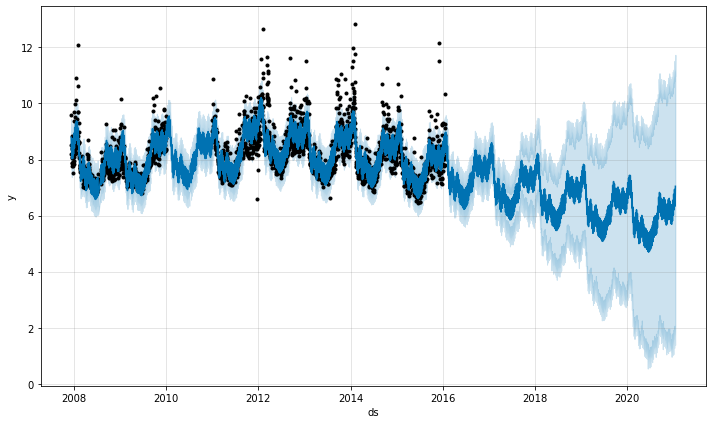

In [39]:
# Python
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
model = Prophet().fit(df)
fig = model.plot(model.predict(future))